In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import h5py
import numpy as np
import statistics 

In [24]:
def get_reads_dict(filename):
    file = h5py.File(filename, "r")
    file = file['Reads']
    reads = []
    for r in file.keys():
        elem = {}
        elem['UUID'] = r
        for k in file[r].keys():
            elem[k]=file[r][k][()]
        reads.append(elem)
    return reads

def normalise_list(lst):
    mmin = min(lst)
    mmax = max(lst)
    lst = (lst - mmin)/(mmax - mmin)
    return lst

def are_signals_equal(s1,s2):
    if(len(s1) != len(s2)):
        return False

    are_equal = True
    for idx, val in enumerate(s1):
        if(s1[idx] != s2[idx]):
            return False
    return True

def find_matches_in_tayiaki_ouput(mapped_reads, unmapped_reads):
    matched = []
    unmatched = []

    for r1 in mapped_reads:
        s1 = r1['Dacs']
        found = False
        for r2 in unmapped_reads:
            s2 = r2['Dacs']
            if(are_signals_equal(s1,s2)):
                found = True
        if(found):
            matched.append(r1)
        else:
            unmatched.append(r1)
    
    return matched, unmatched

def load_reads(f1,f2):
    unmapped_reads = get_reads_dict(f1)
    mapped_reads = get_reads_dict(f2)
    
    return find_matches_in_tayiaki_ouput(mapped_reads, unmapped_reads)

def get_read_attributes(read):
    return read['UUID'], normalise_list(read['Dacs']), read['Ref_to_signal'], read['Reference']

In [34]:
f1 = "./../../taiyakiOutputs/output_createfasta.hdf5"
f2 = "./../../taiyakiOutputs/output_justfromfasta.hdf5"

In [41]:
def plot_dropped_reads(color):
    _, dropped_reads = load_reads(f1,f2)
    for read in dropped_reads:
        plot_read(read, color)
    
def plot_mapped_reads(color):
    mapped_reads, _ = load_reads(f1,f2)
    for read in mapped_reads:
        plot_read(read, color)
    
def plot_read(read, color):
    _, signal, _, _ = get_read_attributes(read)
    plt.figure(figsize=(30,5))
    plt.plot(signal[0:5000], color, label="raw")

C:\Users\mirop\Anaconda3\envs\BDM\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


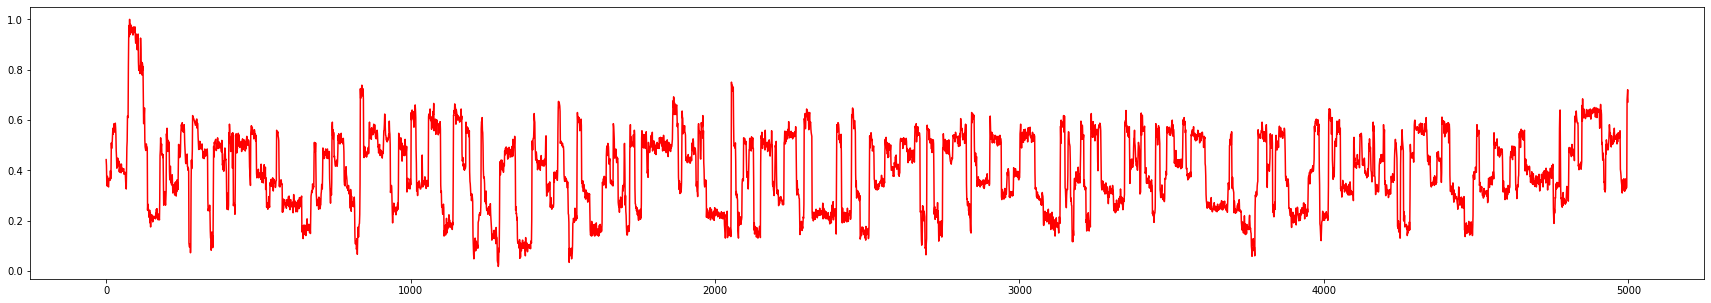

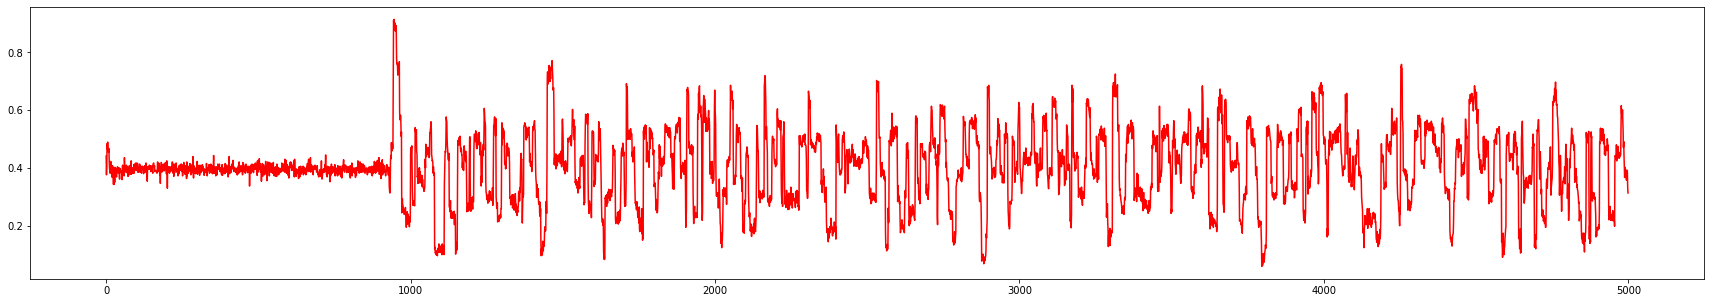

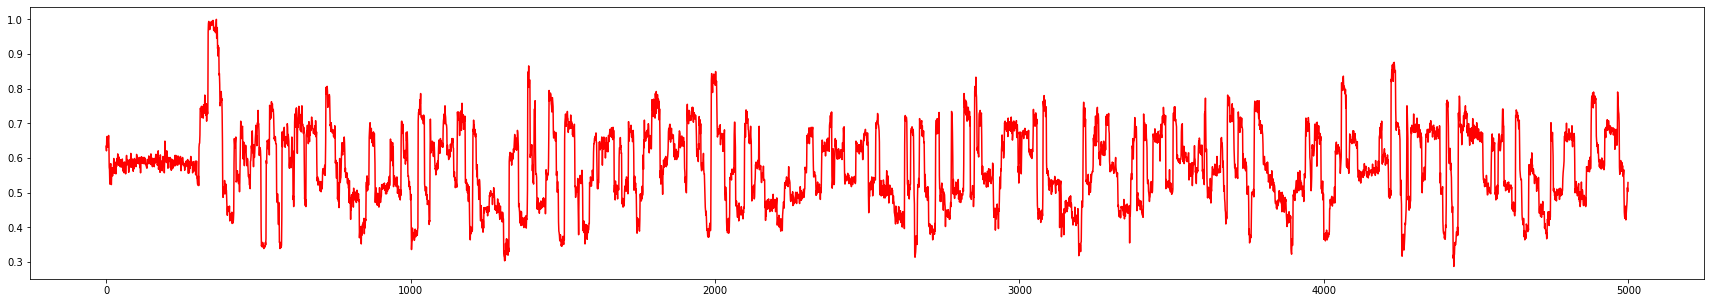

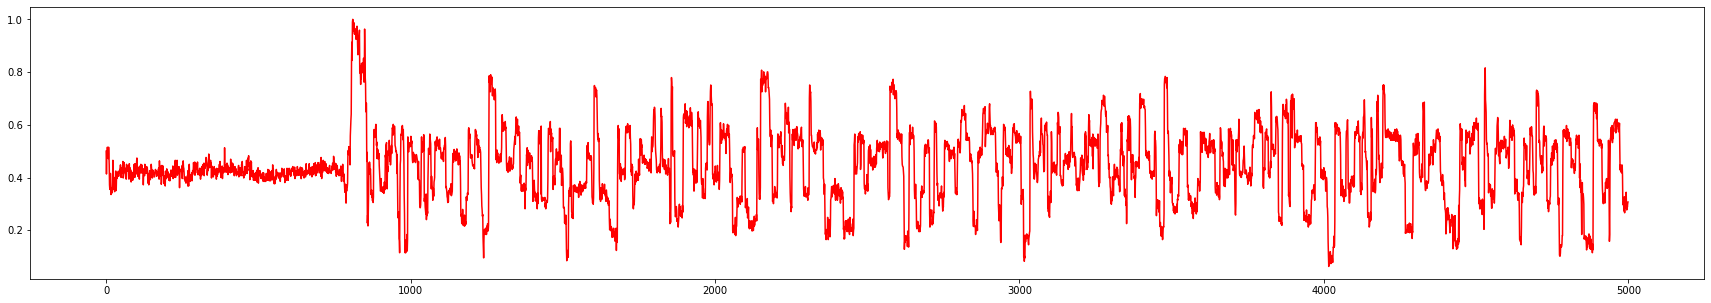

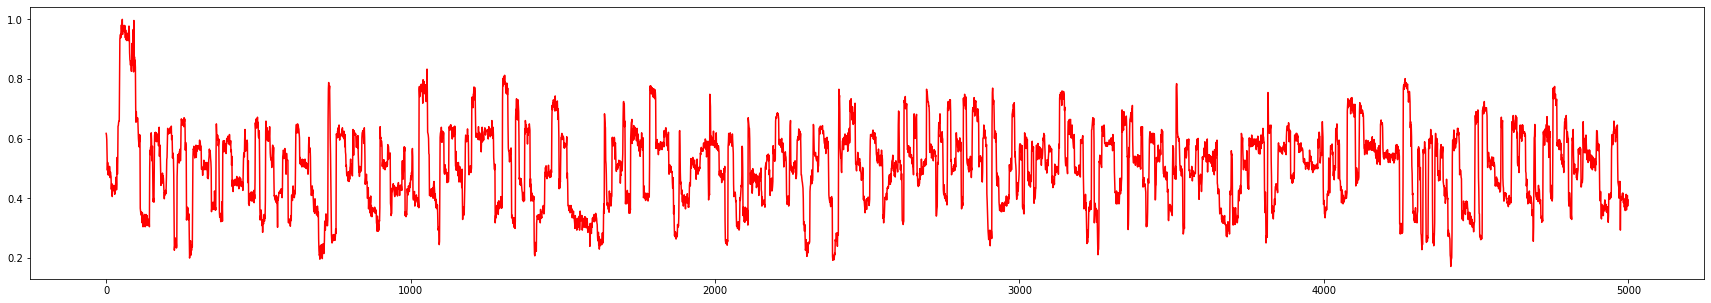

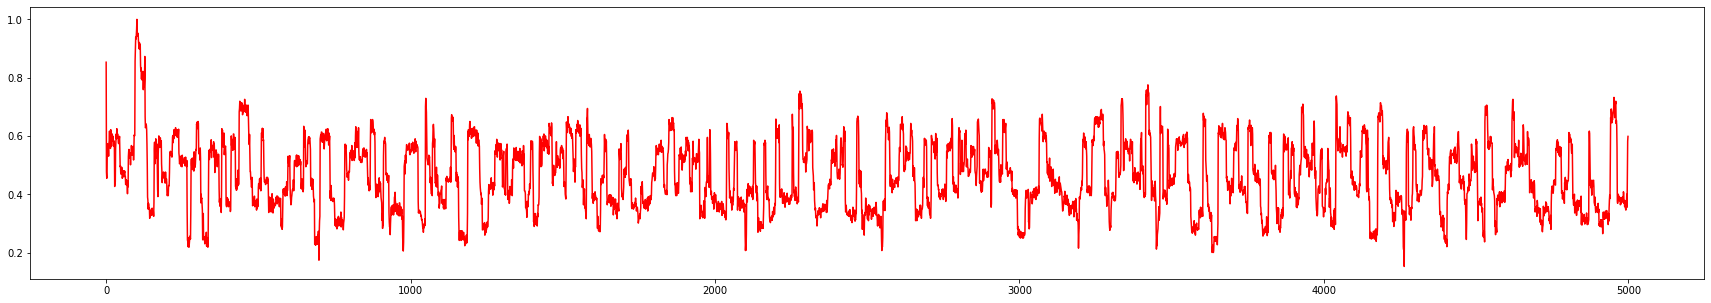

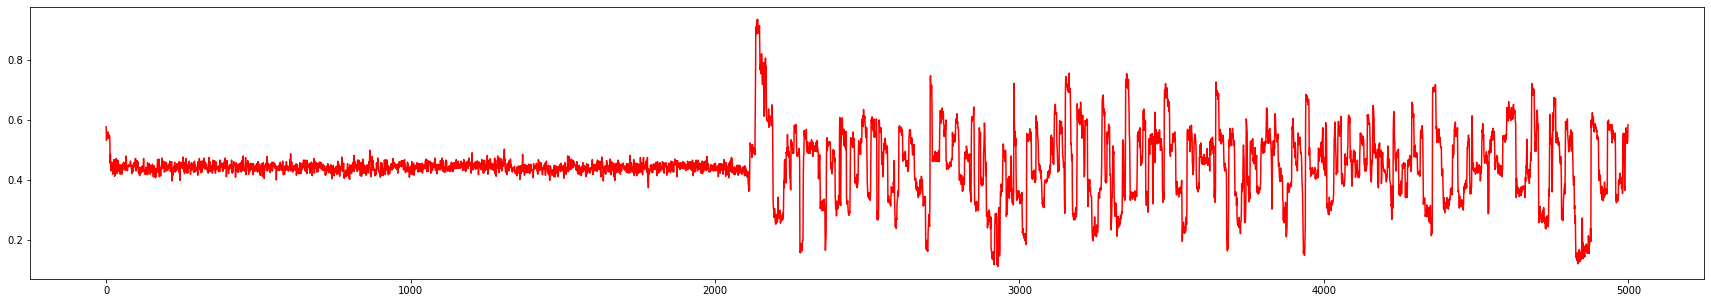

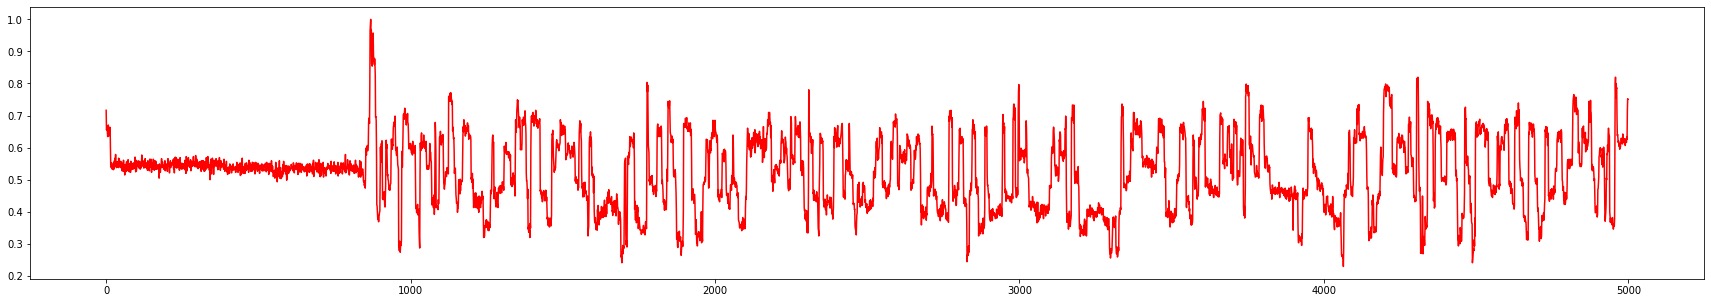

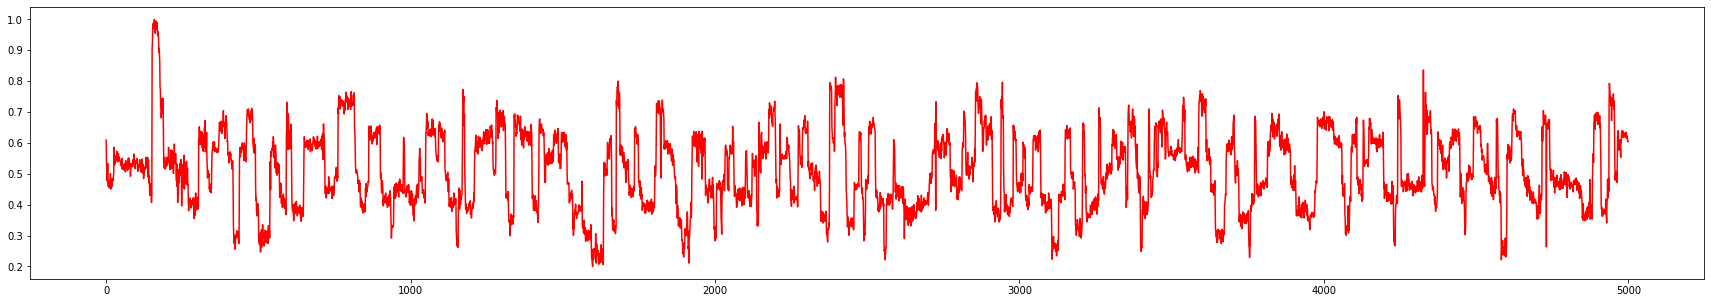

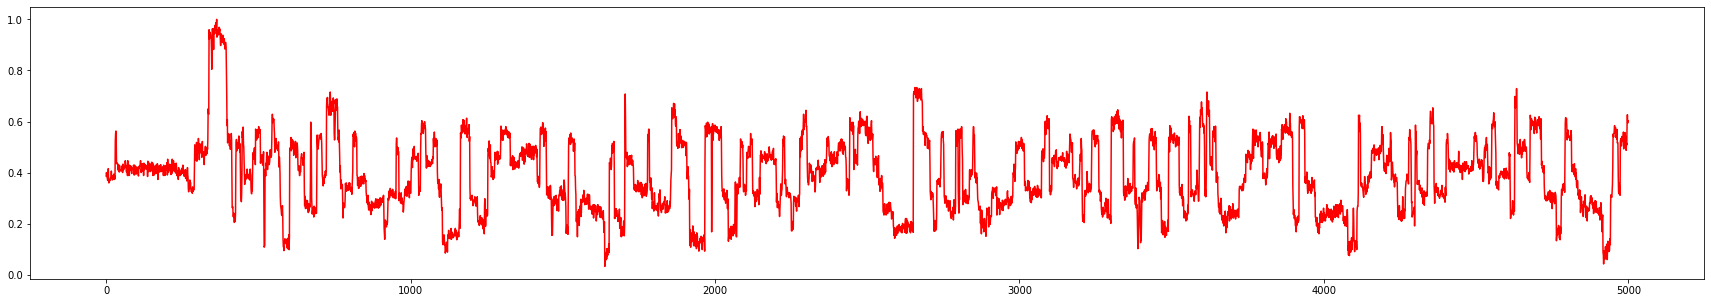

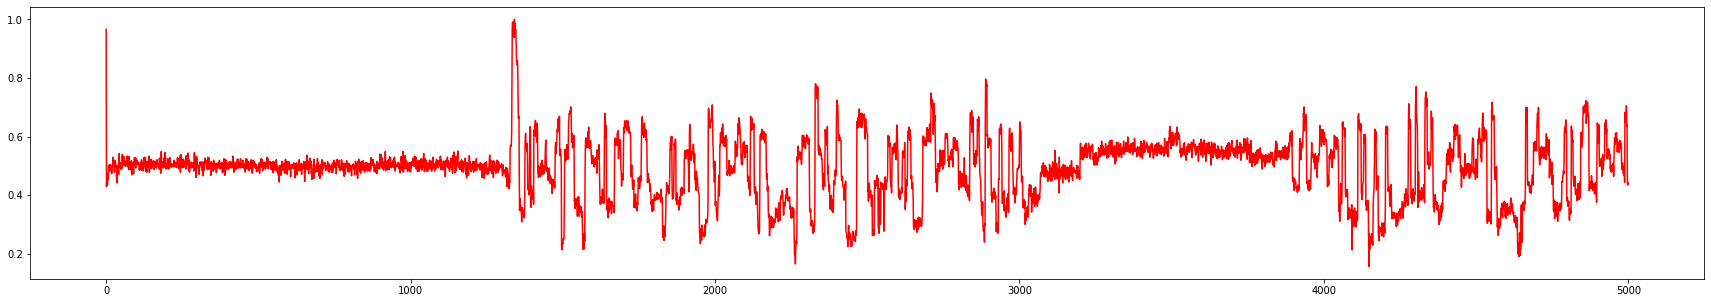

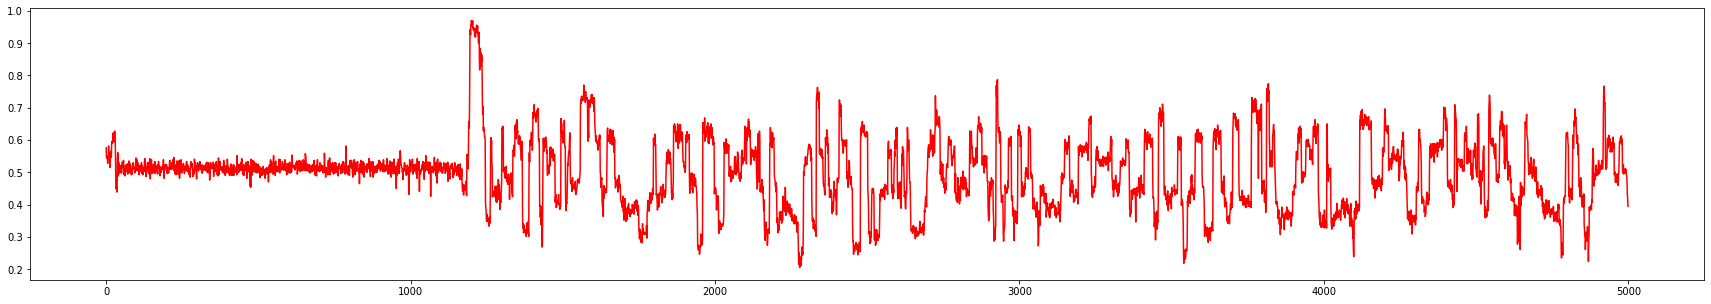

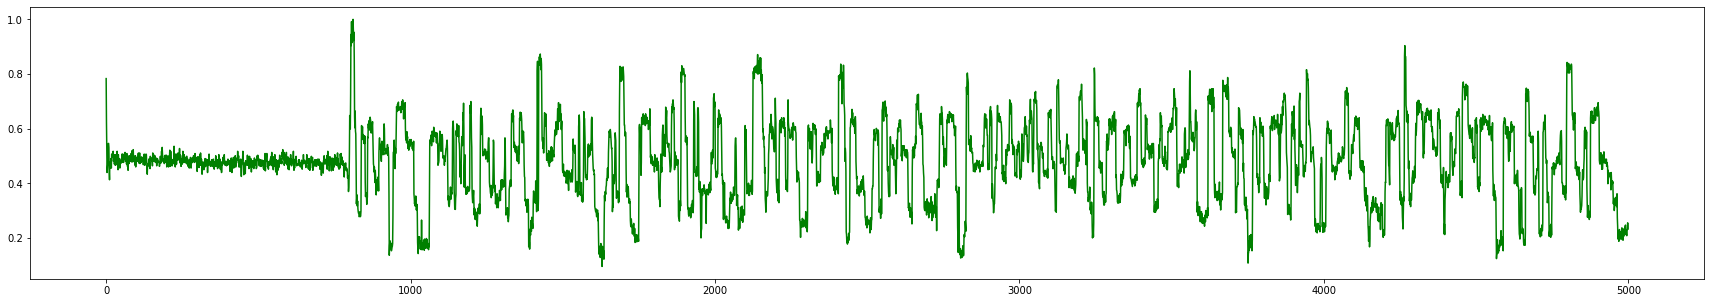

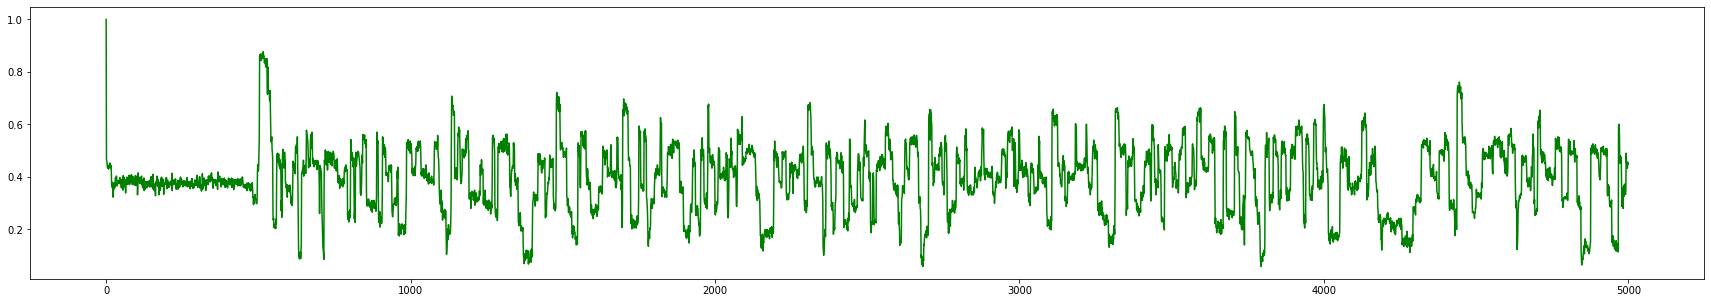

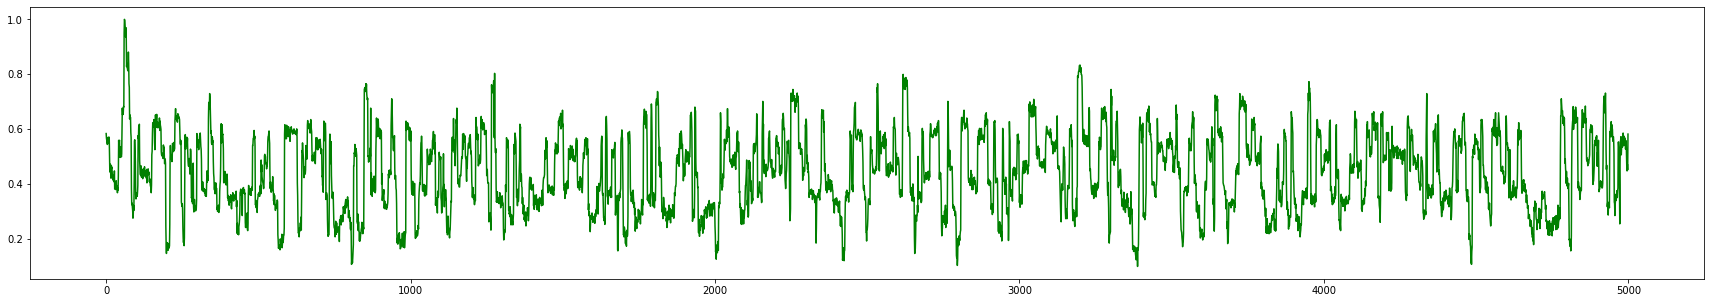

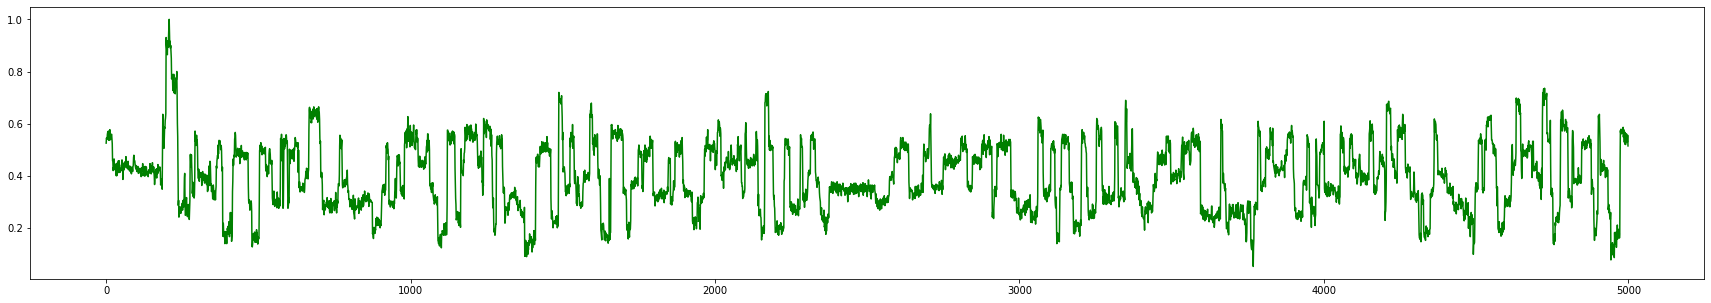

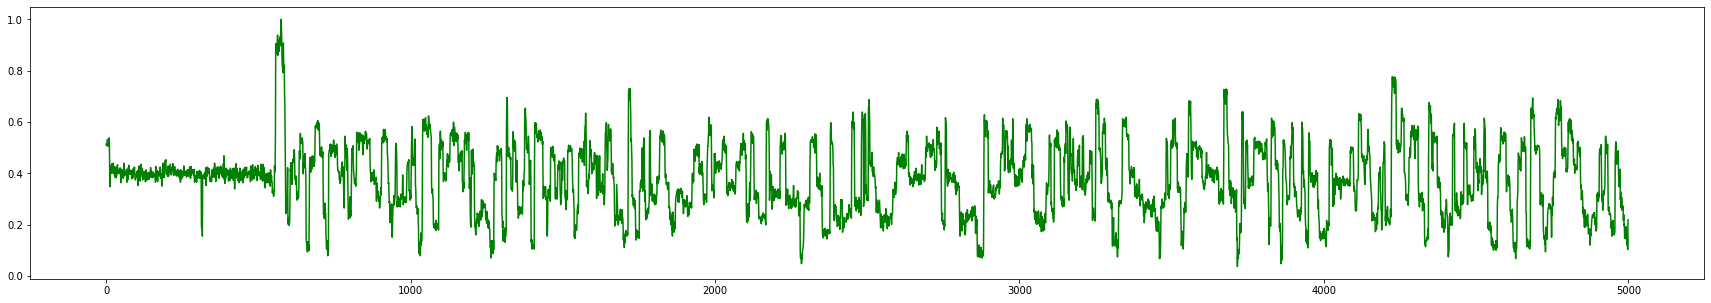

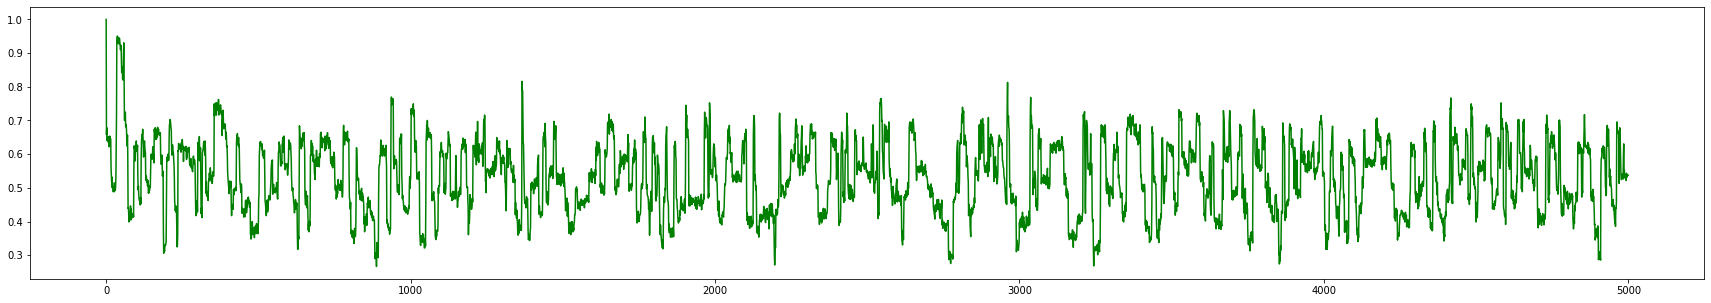

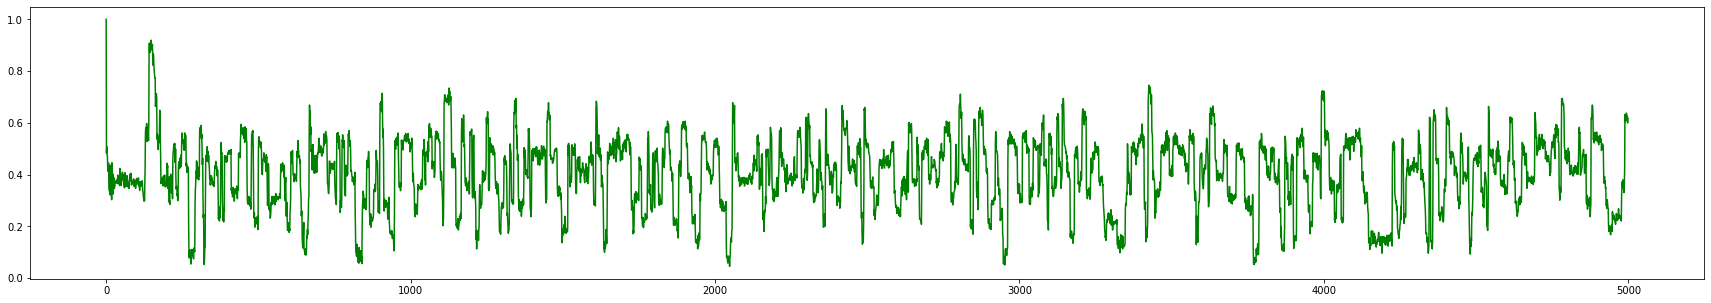

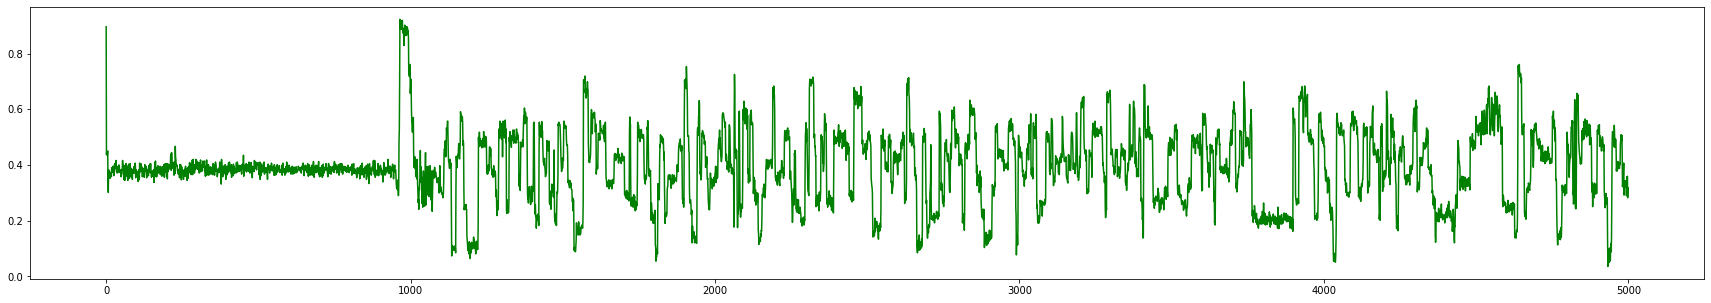

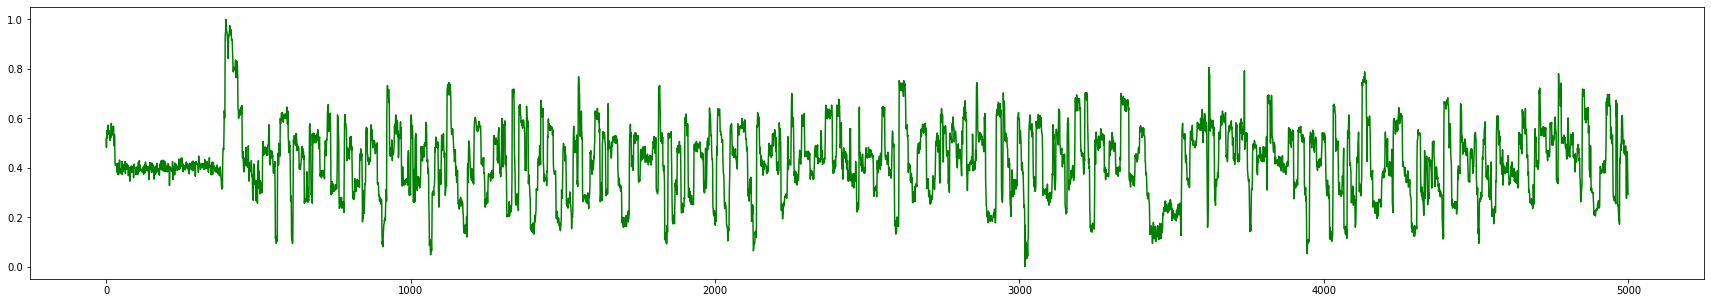

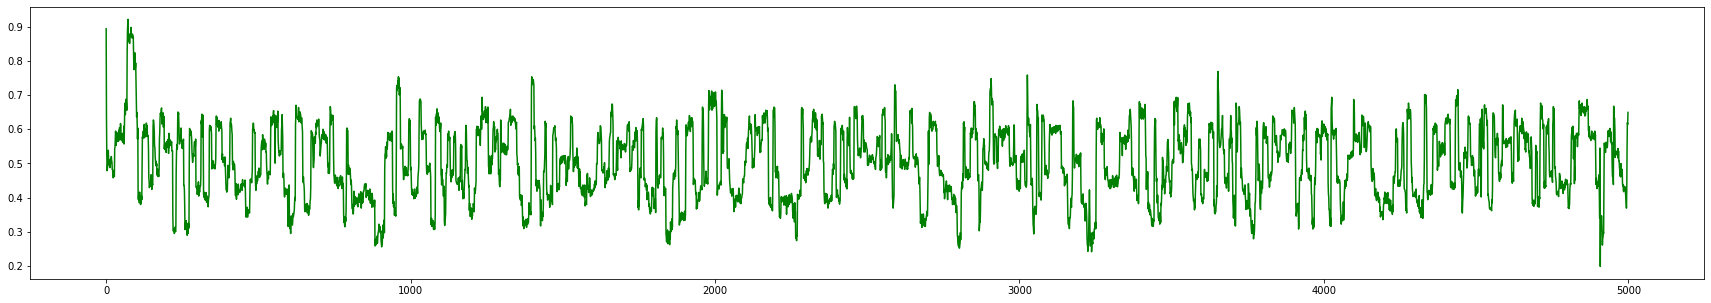

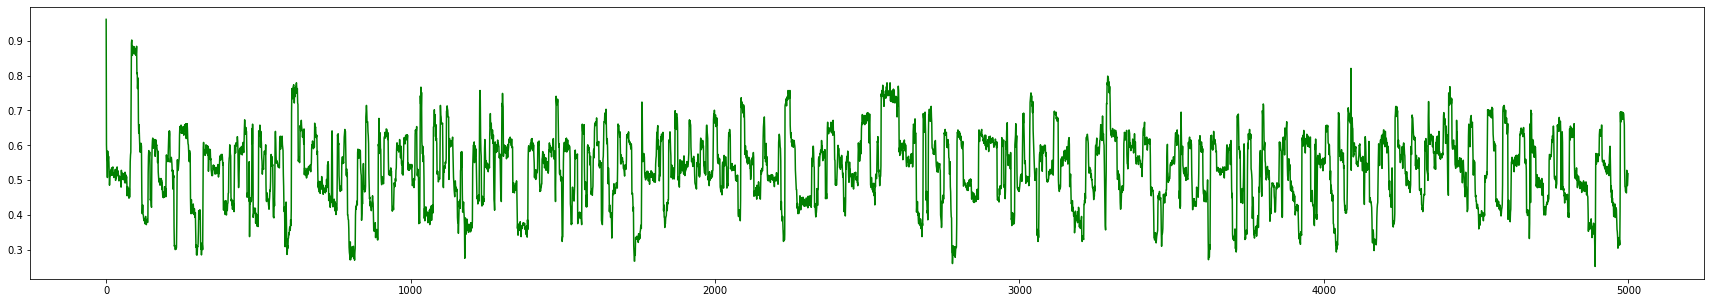

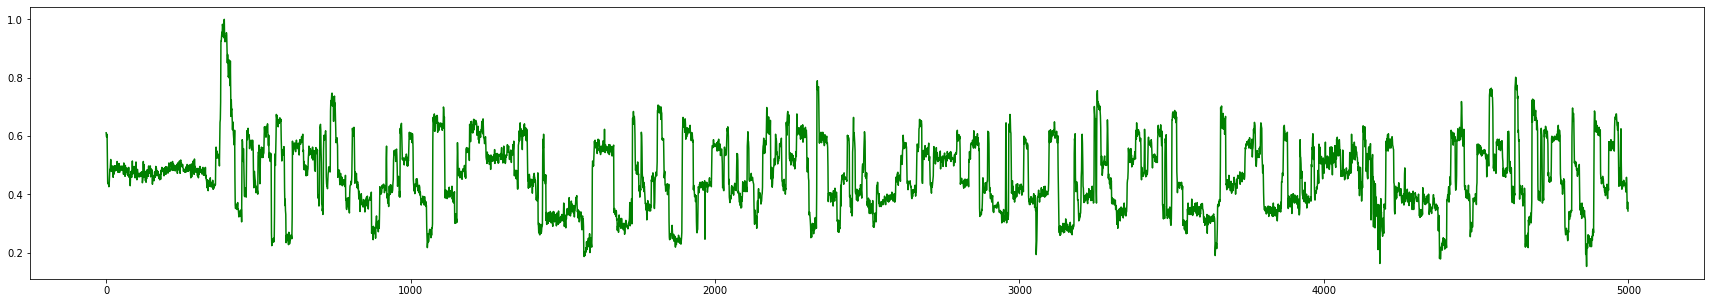

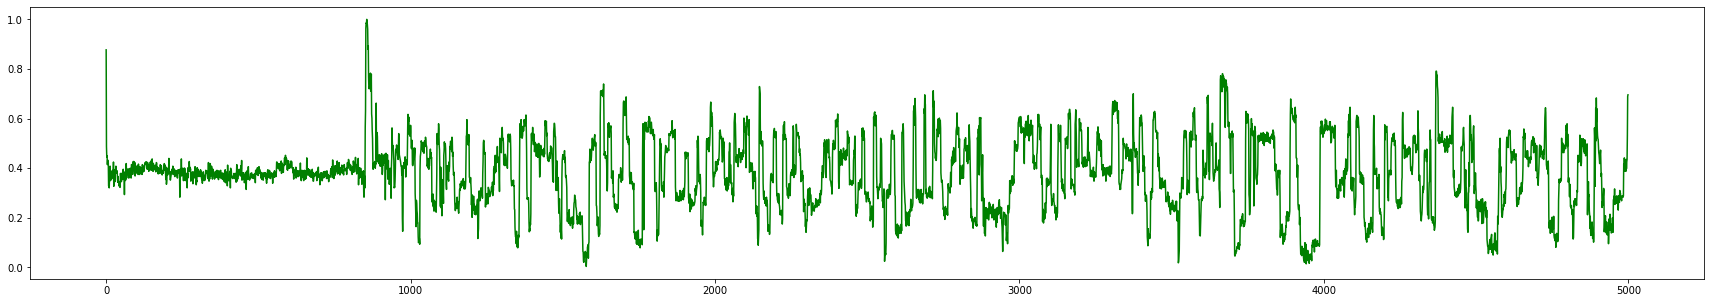

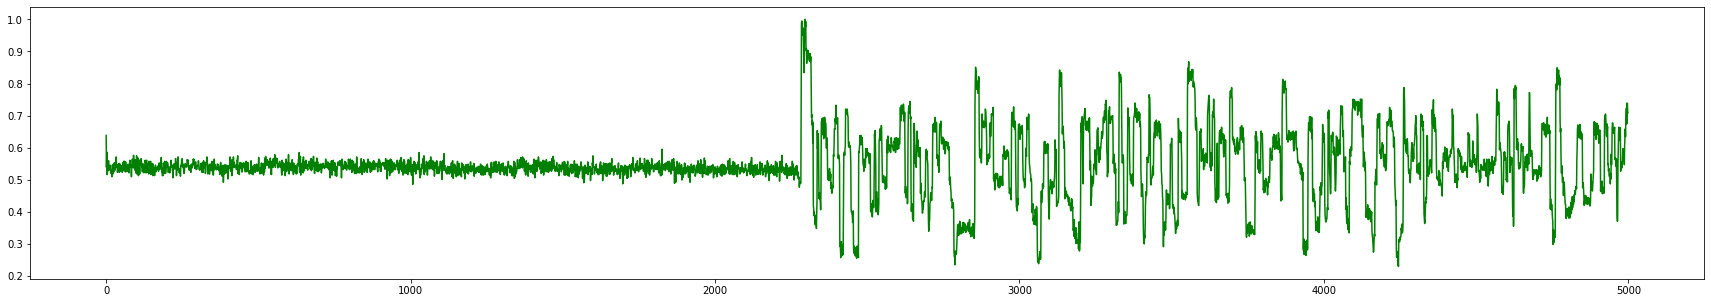

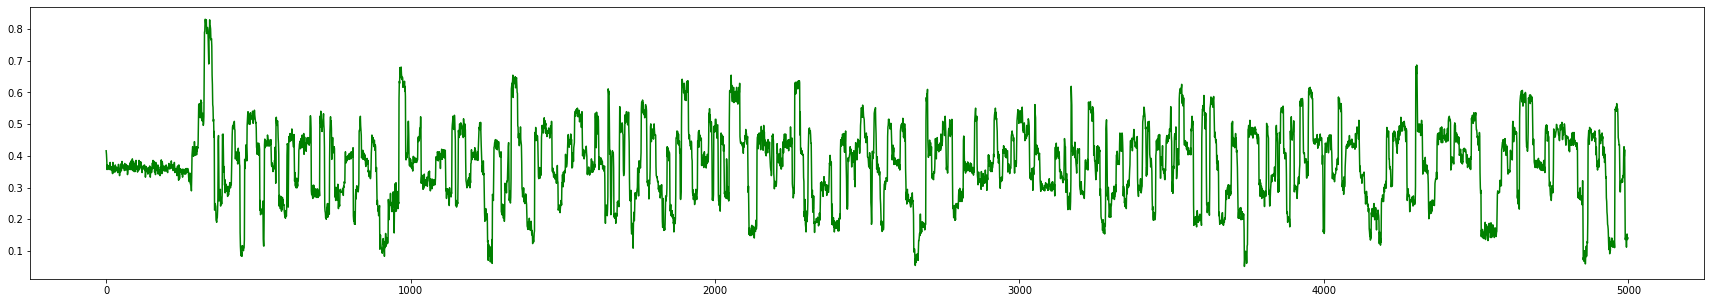

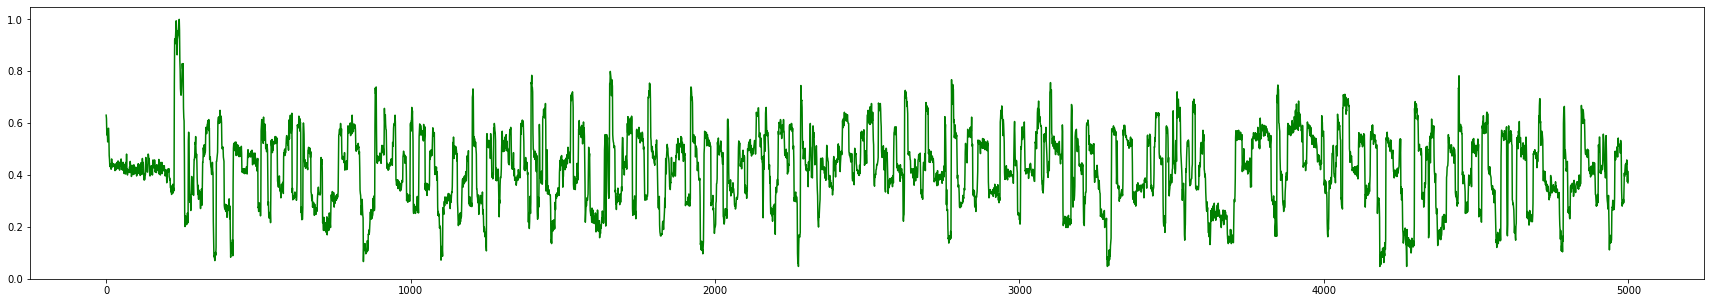

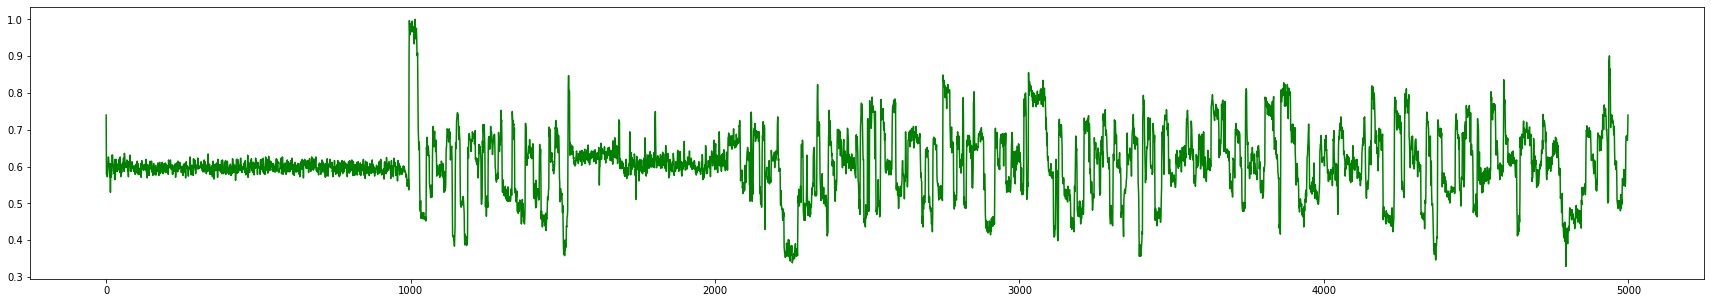

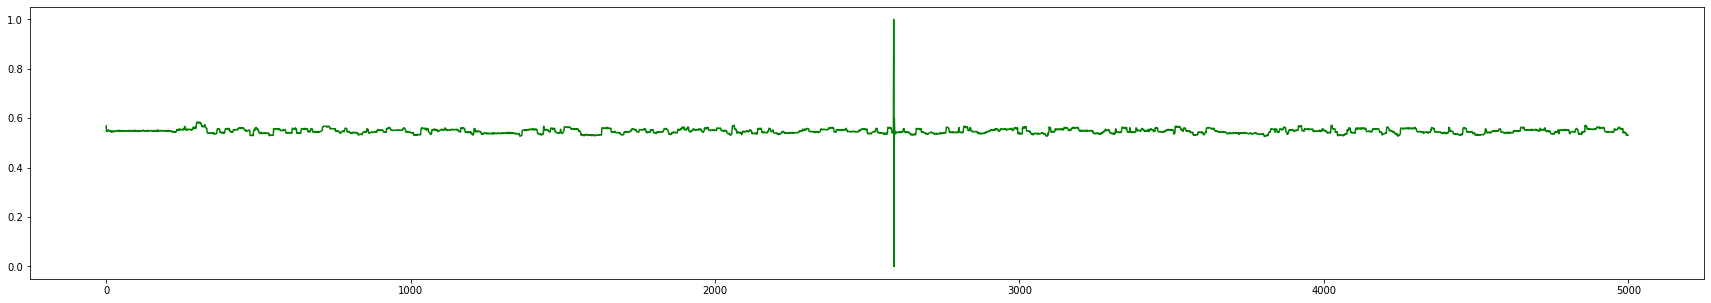

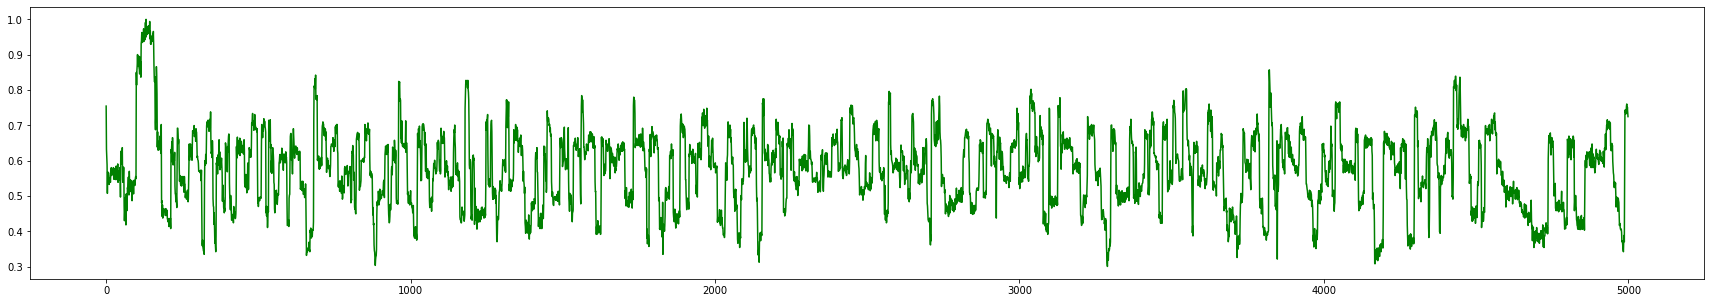

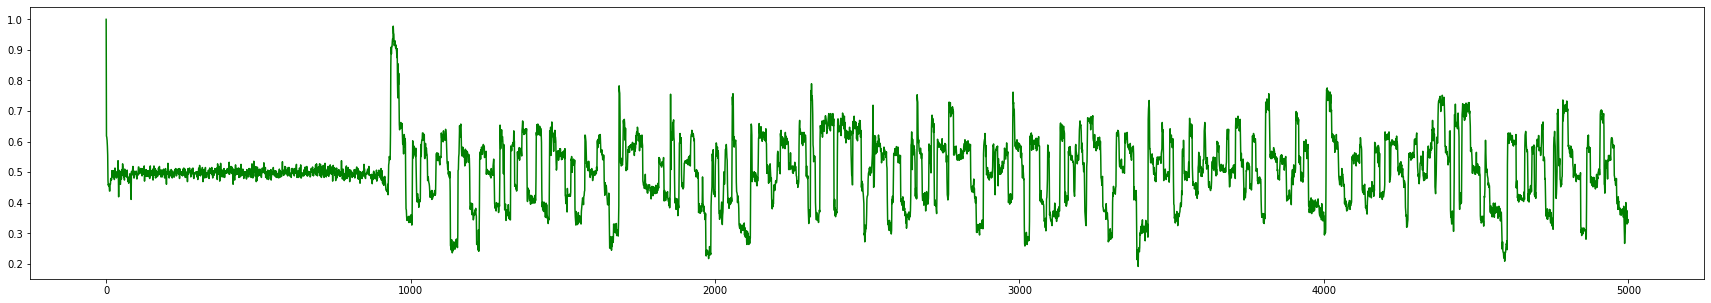

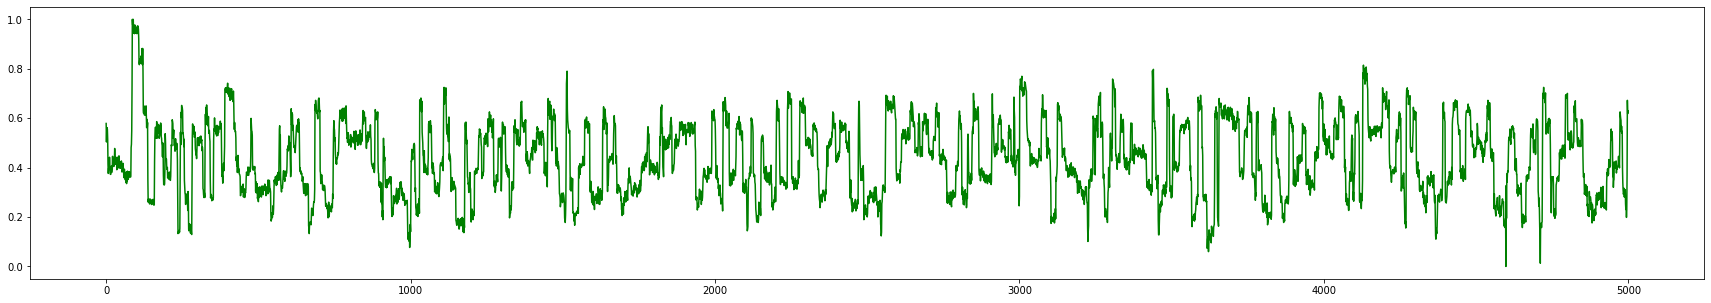

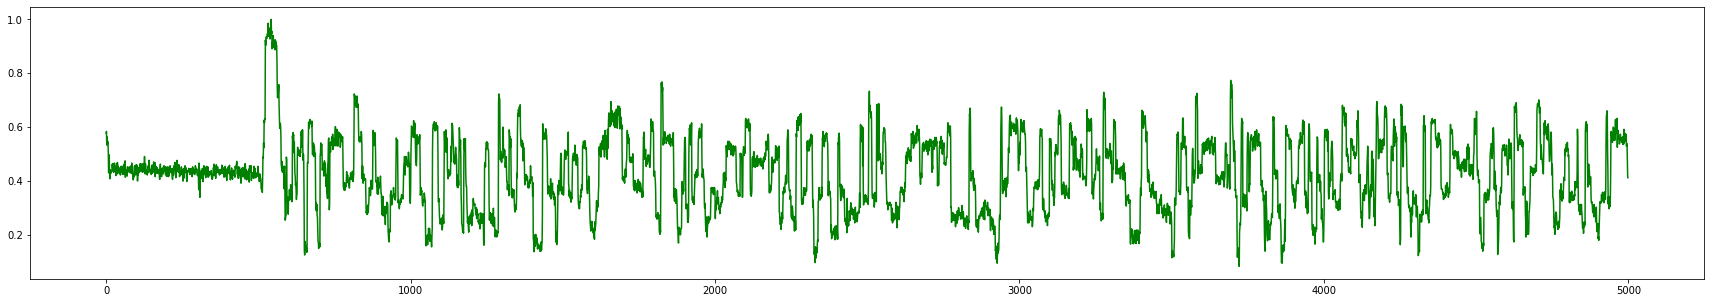

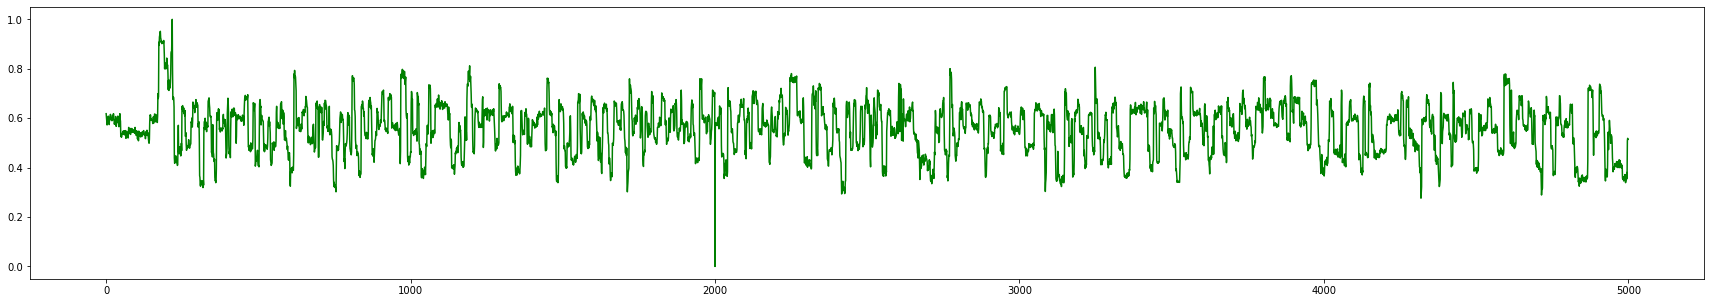

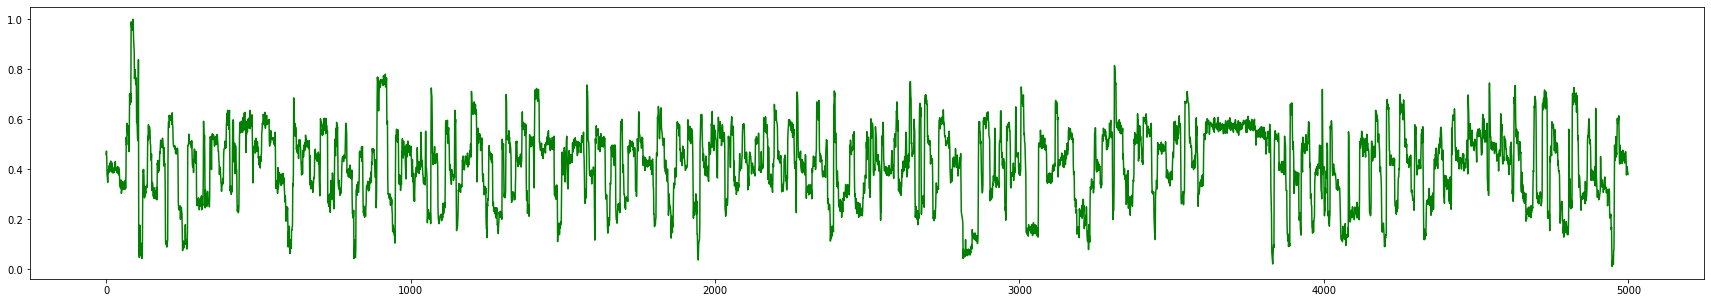

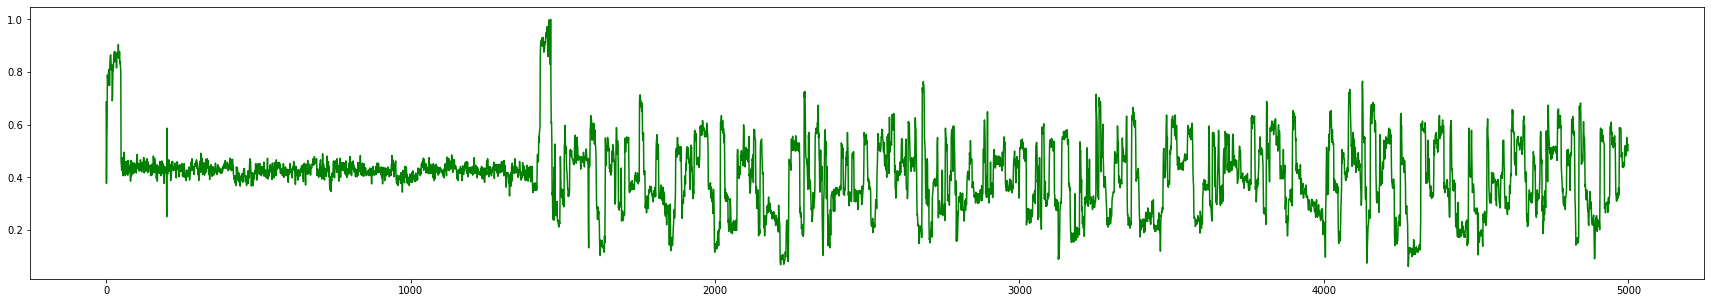

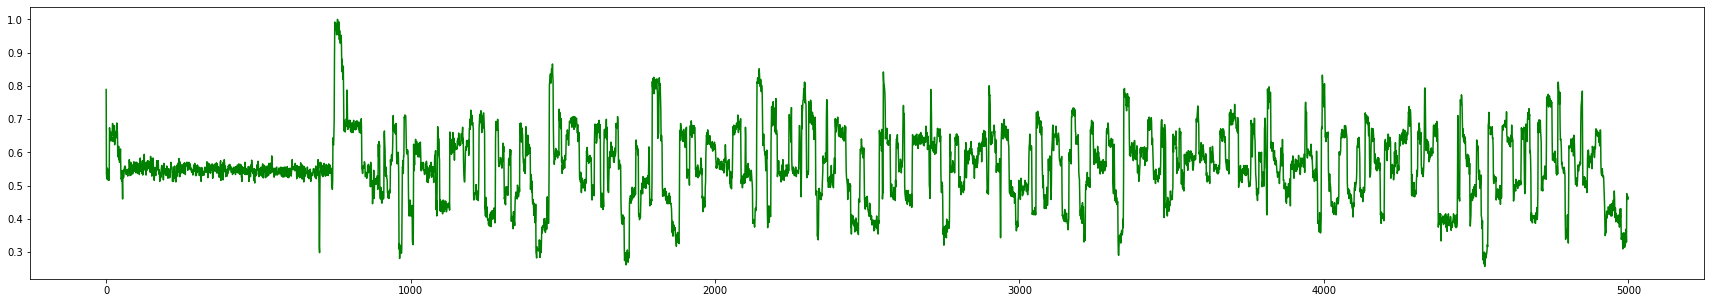

In [36]:
plot_dropped_reads('r')
plot_mapped_reads('g')